In [17]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

labels_path = Path("Images/labels")

def sep_cyt_nuc(label: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Funkce pro rozdělení labelu na cytoplazmu a jádro.

    Args:
        label (np.ndarray): Label.

    Returns:
        tuple[np.ndarray, np.ndarray]: Label cytoplasmy (sloučené s jádrem), label jádra.
    """
    cyt = np.zeros_like(label)
    cyt[label == 1] = 1
    cyt[label == 2] = 1
    nuc = np.zeros_like(label)
    nuc[label == 2] = 1

    return cyt, nuc

for label in labels_path.iterdir():
    if label.is_file():
        label_data = np.loadtxt(label)
        cyt, nuc = sep_cyt_nuc(label_data)
        
        np.save(labels_path / f"cytoplasm/{label.stem}.npy", cyt)
        np.save(labels_path / f"nucleis/{label.stem}.npy", nuc)

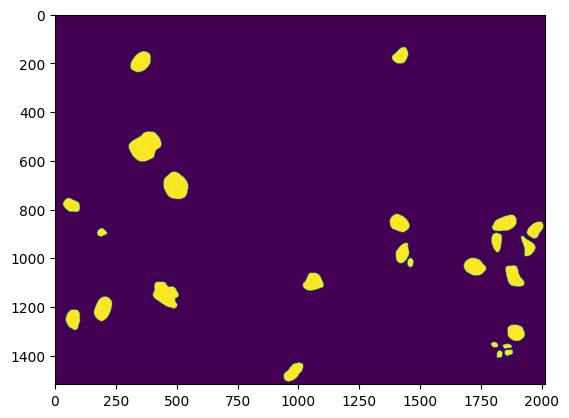

In [14]:
plt.imshow(nuc)
